# Importing all essential libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading DataSet

In [58]:
df= pd.read_csv('add.csv')
df.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


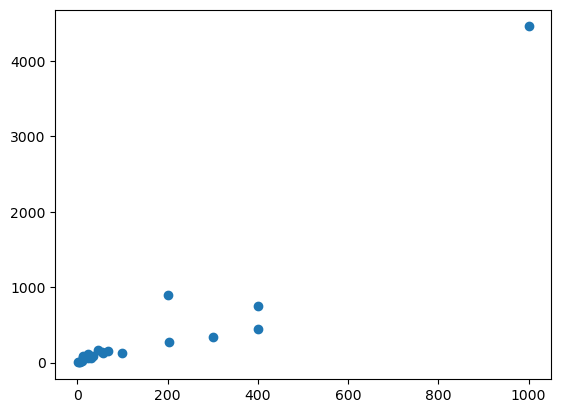

In [59]:
plt.scatter(df['x'], df['sum'])

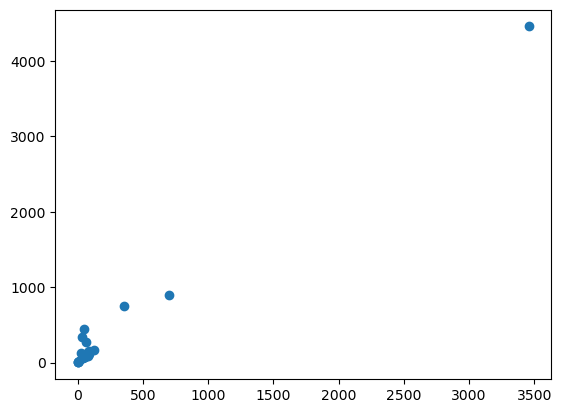

In [14]:
plt.scatter(df['y'], df['sum'])

In [7]:
df.shape
print('Number of rows', df.shape[0])
print('Number of Columns', df.shape[1])

Number of rows 22
Number of Columns 3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       22 non-null     float64
 1   y       22 non-null     float64
 2   sum     22 non-null     float64
dtypes: float64(3)
memory usage: 660.0 bytes


In [9]:
df.describe()

,x,y,sum
count,22.000000,22.000000,22.000000
mean,136.786364,248.686364,385.472727
std,229.622745,732.554988,938.706461
min,1.000000,1.000000,2.000000
25%,15.500000,31.000000,66.500000
50%,40.150000,56.800000,117.450000
75%,175.000000,85.925000,245.975000
max,1000.000000,3456.000000,4456.000000


In [11]:
df.isnull().sum()

x      0
y      0
sum    0
dtype: int64

<Axes: >

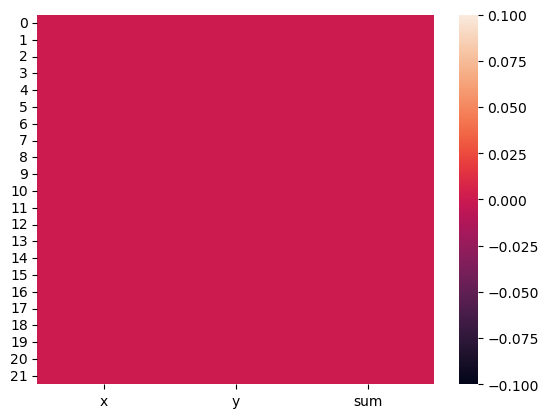

In [10]:
sns.heatmap(df.isnull())

In [16]:
X= df[['x','y']]
y= df[['sum']]

#    Train/Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.33, random_state = 42)


ValueError: Found input variables with inconsistent numbers of samples: [1, 22]

In [23]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


# Import and Train the model

In [65]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Check model's Prediction Performance

In [62]:
model.score(X_train, y_train)

1.0

In [63]:
model.score(X_test, y_test)

1.0

# Comparing results

In [66]:
y_pred = model.predict(X_test)
y_pred

array([[  2. ],
       [112.9],
       [ 68. ],
       [  8. ],
       [900. ],
       [ 66. ],
       [169.4],
       [334. ]])

In [68]:
df1 = pd.DataFrame(('Actual':y_test,'Prediction':y_pred))

SyntaxError: invalid syntax (3155028790.py, line 1)

# Prediction

In [69]:
model.predict([[10,20]])

/Users/sandhya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.]])

# Save Model Usign Joblib

In [70]:
import joblib

In [71]:
joblib.dump(model, 'model_joblib')

['model_joblib']

# Load model

In [72]:
model= joblib.load('model_joblib')

In [73]:
model.predict([[10,4]])

/Users/sandhya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.]])

# GUI

In [74]:
X= df[['x','y']]
y= df[['sum']]

In [75]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [76]:
import joblib
joblib.dump(model, 'model_joblib')

['model_joblib']

In [77]:
model= joblib.load('model_joblib')

In [78]:
model.predict([[10,40]])

/Users/sandhya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.]])

In [79]:
from tkinter import *
import joblib

In [81]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    model = joblib.load('model_joblib')
    result = model.predict([[p1, p2]])
    Label(master, text = 'Sum is: =  ').grid(row = 4)
    Label(master, text = result).grid(row=5)
    print('sum is ', result)

master = Tk()
master.title('Addition of two numbers using ML')
label = Label(master, text = 'Addition of two numbers using ML',
             bg = 'black', fg= 'white').grid(row=0, columnspan = 2)
Label(master, text = "Enter first number").grid(row=1)
Label(master, text = "Enter Second number").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1,column= 1)
e2.grid(row=2,column= 1)
Button (master, text ='predict', command = show_entry_fields).grid()

mainloop()

/Users/sandhya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


sum is  [[4.]]


/Users/sandhya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


sum is  [[4.]]
